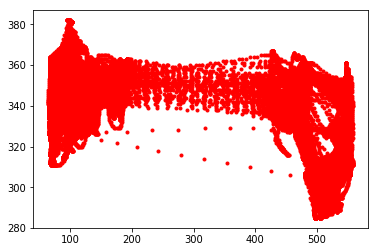

In [2]:
import VideoUtils as vu
import numpy as np
import GeneralUtils as gu
from matplotlib import pyplot as plt

#makeplot = 0
#pvdfile = './RawData/dwP.pvd'
pvdfile = './RawData/maze_dwPout.pvd'
ts, x, y = vu.readPVDfile(pvdfile)

plt.plot(x,y, 'r.')
plt.show()

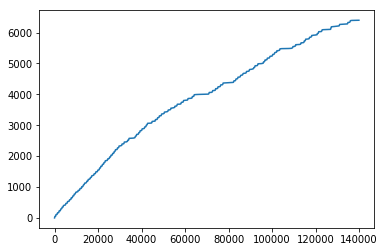

In [3]:
x /= 8.2
xsmooth = np.abs(np.convolve(x, np.ones(100, dtype=np.int), 'valid'))/100

cum = np.cumsum(np.abs(np.diff(xsmooth)))

plt.plot(cum)
plt.show()

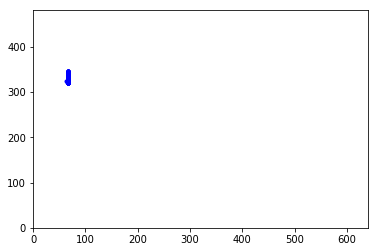

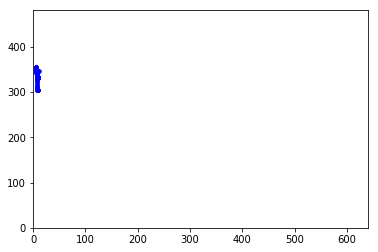

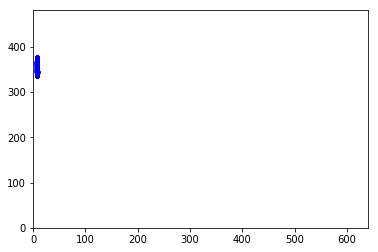

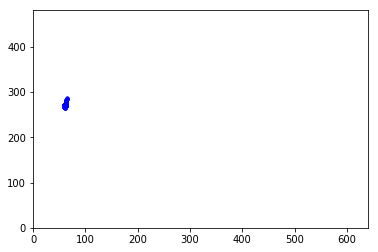

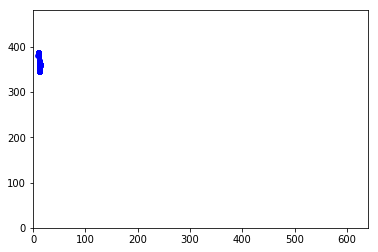

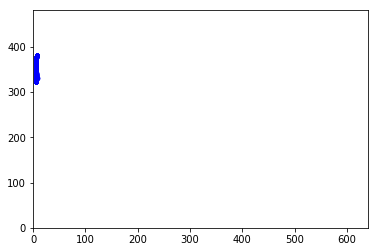

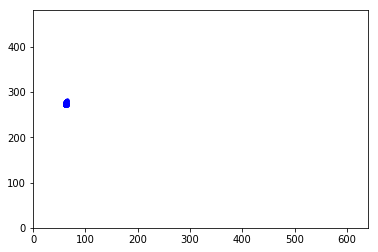

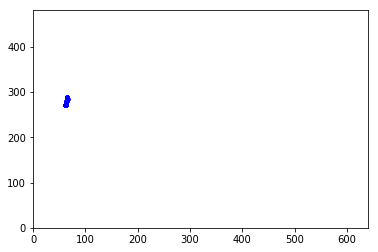

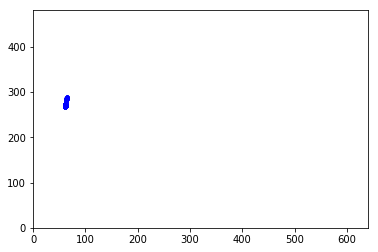

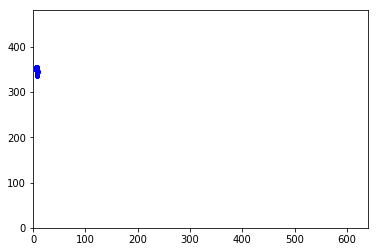

In [8]:
inotmoving = np.where(np.diff(cum)<.025)[0]

makeplot = 1
grouped = gu.group_consecutives(inotmoving)

starts = []
stops = []

for group in grouped:
    if group[-1] - group[0]  > 1000:
      starts.append(ts[group[0]])
      stops.append(ts[group[-1]])
     # minix = x[group[0]:group[-1]]
      if makeplot == 1:
        plt.plot(x[group[0]:group[-1]], y[group[0]:group[-1]],'b.')
        plt.ylim([0,480])
        plt.xlim([0,640])
        plt.show()


outfile = './RawData/NOTMOVING'
#np.savez(outfile, starts, stops)
